In [21]:
#helps to run cells withou restarting the whole notebook after .py files were updated
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description

### In this notebook, we tried to use the top2vec library to find the correlation. By default it uses doc2vec embedding, but keeps the same components of UMAP and HDBSCAN clustering methods. It uses cosine similarity to output the necessary cluster. At the end we calculated the correlation coefficient and demonstrated the wordcloud for the certain cluster.

In [22]:
#necessary libraries
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import random
import correlation #see correlation.py file

random.seed(42);

In [23]:
#reading necessary files
folder = "files/"
sentiments = pd.read_csv(folder + "sentimented_tweets_with_stopwords.csv")
stocks = pd.read_csv(folder + "clean_stocks.csv")

### In the cell below the first line creates the Top2Vec model and immediately clusterizes the tweets. Third line in the code find the top 3 clusters that are similar to the word tesla, using cosine similiarity

In [20]:
model = Top2Vec(list(sentiments.tweet), speed="learn", workers = 20)
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["tesla"], num_topics=3)
topic_words[:3]

2021-12-06 14:35:28,349 - top2vec - INFO - Pre-processing documents for training
2021-12-06 14:35:28,743 - top2vec - INFO - Creating joint document/word embedding
2021-12-06 14:37:11,846 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-06 14:37:20,823 - top2vec - INFO - Finding dense areas of documents
2021-12-06 14:37:21,101 - top2vec - INFO - Finding topics


[array(['deep', 'mayemusk', 'no', 'absolutely', 'cape', 'here', 'stop',
        'technology', 'interesting', 'less', 'service', 'article',
        'lexfridman', 'design', 'fine', 'likely', 'sciguyspace', 'water',
        'california', 'its', 'ppathole', 'speed', 'sure', 'mkbhd',
        'building', 'around', 'anything', 'weeks', 'isn', 'great', 'ai',
        'wow', 'renatakonkoly', 'doesn', 'three', 'easy', 'best',
        'slightly', 'being', 'delayslater', 'life', 'thirdrowtesla', 'btw',
        'cool', 'even', 'world', 'tomorrow', 'never', 'haha', 'live'],
       dtype='<U15'),
 array(['better', 'auto', 'be', 'much', 'risk', 'an', 'cars', 'id', 'like',
        'company', 'good', 'later', 'progress', 'system', 'in', 'tesla',
        'almost', 'what', 'evafoxu', 'many', 'feed', 'fire', 'data',
        'support', 'rocket', 'called', 'extremely', 'order', 'china',
        'cleantechnica', 'week', 'look', 'one', 'far', 'hardware', 'that',
        'actually', 'will', 'yeah', 'still', 'the

### Below we selected the first cluster and output all the tweets in that cluster with its cosine similarity score

In [24]:
print("Topic Scores:", topic_scores) #outputs the cosine similarity values of the top 3 clusters
print("Topics Nums:", topic_nums) #outputs the index of the top 3 clusters
tesla = pd.DataFrame(columns = ['tweet', 'score', 'id'])
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_nums[0], num_docs = topic_sizes[topic_nums[0]])
#the loop below will show all the tweets that are in the first cluster
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    tesla = tesla.append({'tweet': doc, 'score': score, 'id': doc_id}, ignore_index = True)
tesla.head()

Topic Scores: [0.97121853 0.55506532 0.40767624]
Topics Nums: [0 5 4]


,tweet,score,id
0,RationalEtienne TimothyBuffett WhatsupFranks k...,0.998363,2254
1,annerajb highlyaaronic Orbital refilling is cr...,0.998249,5154
2,Erdayastronaut MarcusHouseGame Maybe start on ...,0.998029,783
3,DiscoverMag There s a massive amount of CO on ...,0.997843,7726
4,JonErlichman That funding round completed pm o...,0.997730,1006


In [29]:
#merge the dataframe above with the sentiments
t2v_best = sentiments.merge(tesla, on ="tweet", how = "inner")
t2v_best.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,reply_to,textblob_sentiment,bertweet_sentiment,distilbert_sentiment,score,id
0,2021-03-22 02:10:37,bluemoondance NASASpaceflight Going well. Lot ...,en,[],[],https://twitter.com/elonmusk/status/1373819373...,False,2678,234,134,"[{'screen_name': 'bluemoondance74', 'name': 'R...",0,0,1,0.988745,0
1,2021-03-21 20:39:07,NASASpaceflight Hopefully will happen this decade,en,[],[],https://twitter.com/elonmusk/status/1373735946...,False,7967,535,570,"[{'screen_name': 'NASASpaceflight', 'name': 'C...",0,1,1,0.970028,1
2,2021-03-21 08:42:00,newscientist True,en,[],[],https://twitter.com/elonmusk/status/1373555480...,False,15510,539,409,"[{'screen_name': 'newscientist', 'name': 'New ...",1,0,1,0.773646,2
3,2021-03-21 05:31:31,cleantechnica I am accumulating resources to h...,en,[],[],https://twitter.com/elonmusk/status/1373507545...,False,143476,10500,12483,"[{'screen_name': 'cleantechnica', 'name': 'Cle...",1,0,1,0.969291,3
4,2021-03-21 04:32:11,CathieDWood When vast amounts of manufacturing...,en,[],[],https://twitter.com/elonmusk/status/1373492611...,False,6568,376,425,"[{'screen_name': 'CathieDWood', 'name': 'Cathi...",1,0,1,0.994185,4


In [30]:
#merge with stocks
t2v_best.date = pd.to_datetime(t2v_best.date).dt.normalize()
stocks.date = pd.to_datetime(stocks.date)
df = pd.merge(t2v_best, stocks, on = 'date', how = 'inner')
df['top2vec'] = 1
df.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,...,bertweet_sentiment,distilbert_sentiment,score,id,open,high,low,close,adj,top2vec
0,2021-03-22,bluemoondance NASASpaceflight Going well. Lot ...,en,[],[],https://twitter.com/elonmusk/status/1373819373...,False,2678,234,134,...,0,1,0.988745,0,684.590027,699.619995,668.750000,670.000000,670.000000,1
1,2021-03-21,NASASpaceflight Hopefully will happen this decade,en,[],[],https://twitter.com/elonmusk/status/1373735946...,False,7967,535,570,...,1,1,0.970028,1,675.092514,689.022491,657.717499,666.217499,666.217499,1
2,2021-03-21,newscientist True,en,[],[],https://twitter.com/elonmusk/status/1373555480...,False,15510,539,409,...,0,1,0.773646,2,675.092514,689.022491,657.717499,666.217499,666.217499,1
3,2021-03-21,cleantechnica I am accumulating resources to h...,en,[],[],https://twitter.com/elonmusk/status/1373507545...,False,143476,10500,12483,...,0,1,0.969291,3,675.092514,689.022491,657.717499,666.217499,666.217499,1
4,2021-03-21,CathieDWood When vast amounts of manufacturing...,en,[],[],https://twitter.com/elonmusk/status/1373492611...,False,6568,376,425,...,0,1,0.994185,4,675.092514,689.022491,657.717499,666.217499,666.217499,1


### Now we proceed to calculate the correlation coefficient with different parameters for sentiments, percent_change and delay. We use the functions defined in correlation.py document

In [31]:
methods = ['top2vec']
cramer = correlation.find_correlation(df, methods).sort_values('cramer', ascending=False).reset_index(drop = True)
cramer['size'] = df.shape[0]
cramer

,method,cluster,type,cramer,percent_change,delay,size
0,top2vec,1,textblob_sentiment,0.03069,1,2,8520
1,top2vec,1,textblob_sentiment,0.02782,1.5,2,8520
2,top2vec,1,textblob_sentiment,0.02435,1.5,1,8520
3,top2vec,1,textblob_sentiment,0.02399,0.5,2,8520
4,top2vec,1,textblob_sentiment,0.02355,2,2,8520
5,top2vec,1,textblob_sentiment,0.02324,2,1,8520
6,top2vec,1,textblob_sentiment,0.02292,1,1,8520
7,top2vec,1,textblob_sentiment,0.02109,2,3,8520
8,top2vec,1,textblob_sentiment,0.02108,1.5,3,8520
9,top2vec,1,bertweet_sentiment,0.02009,1.5,3,8520


dict_keys(['amp', 'Tesla', 'will', 's', 'car', 'SpaceX', 'good', 'great', 'year', 'need', 'time', 'make', 'Yes', 'Thank', 'work', 'one', 'flcnhvy', 'new', 'people', 'Yeah', 'first', 'rocket', 'U', 'now', 'Exactly', 'many', 'high', 'm', 'actually', 'v', 're', 'Maybe', 'probably', 'even', 'Erdayastronaut', 'engine', 'better', 'day', 'launch', 'don t', 'production', 'way', 'Starship', 'true', 'sure', 'Mars', 'right', 'much', 'Teslarati', 'Model S'])


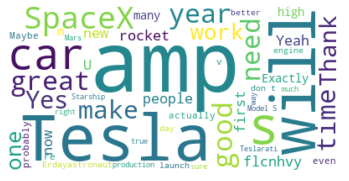

In [32]:
#The wordcloud of the top 1 cluster
correlation.generate_wordcloud(df, 'top2vec', 1)

### As we can see, the cluster is indeed about the Tesla, however the correlation coefficient was very low 0.03069 which means there is no correlation. The Doc2Vec embedding was succesfull in finding the cluster but had almost same results to other methods with succesfull clusters.